# Clustering & Hyperparameter Tuning/Searching

## Goal: 
A bank wants to launch a new marketing campaign, but needs to find their target audiences, that's where you come in! Find and compare different customer segments and propose how to approach them via marketing.
## Description: 
This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables
## Technologies: 
K-means, Hierarchical, Mean Shift, DBSCAN
## Download: 
https://www.kaggle.com/arjunbhasin2013/ccdata

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# Load and read CSV file
df = pd.read_csv("credit.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# Exploring the dataset

In [3]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Get descriptive statistics
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [5]:
# Get data types of columns
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

# Data Cleaning

In [6]:
# Get number of null values in each column
null_values = df.isnull().sum()

In [7]:
# Get list of column names
column_names = list(df.columns.values)
print(column_names)

['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


In [8]:
# Fill minimum payments column with 0
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(0)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# Drop remaining null values (in credit limit column)
df.dropna(inplace=True)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
# Drop customer ID column (unique and not useful for analysis)
df.drop("CUST_ID", axis=1, inplace=True)

# Data Visualization

In [11]:
# Get correlation between columns
corr = df.corr()
corr

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322335   0.181230   
BALANCE_FREQUENCY                 0.322335           1.000000   0.133586   
PURCHASES                         0.181230           0.133586   1.000000   
ONEOFF_PURCHASES                  0.164326           0.104257   0.916844   
INSTALLMENTS_PURCHASES            0.126437           0.124204   0.679889   
CASH_ADVANCE                      0.496679           0.099312  -0.051495   
PURCHASES_FREQUENCY              -0.078054           0.229440   0.392991   
ONEOFF_PURCHASES_FREQUENCY        0.073114           0.202295   0.498413   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063267           0.175869   0.315537   
CASH_ADVANCE_FREQUENCY            0.449246           0.192022  -0.120137   
CASH_ADVANCE_TRX                  0.385139           0.141516  -0.067194   
PURCHASES_TRX                     0.154297           0.189527   0.689552   
CREDIT_LIMIT                      0.531283           0.095843   0.356963   
PAYMENTS                          0.322769           0.064842   0.603252   
MINIMUM_PAYMENTS                  0.399628           0.140586   0.096977   
PRC_FULL_PAYMENT                 -0.319018          -0.095308   0.180356   
TENURE                            0.072421           0.118566   0.086155   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164326                0.126437   
BALANCE_FREQUENCY                         0.104257                0.124204   
PURCHASES                                 0.916844                0.679889   
ONEOFF_PURCHASES                          1.000000                0.330610   
INSTALLMENTS_PURCHASES                    0.330610                1.000000   
CASH_ADVANCE                             -0.031341               -0.064264   
PURCHASES_FREQUENCY                       0.264913                0.442398   
ONEOFF_PURCHASES_FREQUENCY                0.524881                0.214016   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127699                0.511334   
CASH_ADVANCE_FREQUENCY                   -0.082622               -0.132312   
CASH_ADVANCE_TRX                         -0.046226               -0.074017   
PURCHASES_TRX                             0.545514                0.628097   
CREDIT_LIMIT                              0.319724                0.256499   
PAYMENTS                                  0.567283                0.384066   
MINIMUM_PAYMENTS                          0.051138                0.135208   
PRC_FULL_PAYMENT                          0.132745                0.182548   
TENURE                                    0.064047                0.086016   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496679            -0.078054   
BALANCE_FREQUENCY                     0.099312             0.229440   
PURCHASES                            -0.051495             0.392991   
ONEOFF_PURCHASES                     -0.031341             0.264913   
INSTALLMENTS_PURCHASES               -0.064264             0.442398   
CASH_ADVANCE                          1.000000            -0.215579   
PURCHASES_FREQUENCY                  -0.215579             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086786             0.501305   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177118             0.862921   
CASH_ADVANCE_FREQUENCY                0.628535            -0.308483   
CASH_ADVANCE_TRX                      0.656493            -0.203541   
PURCHASES_TRX                        -0.075877             0.568408   
CREDIT_LIMIT                          0.303985             0.119788   
PAYMENTS                              0.453226             0.103393   
MINIMUM_PAYMENTS                      0.141478             0.007896   
PRC_FULL_PAYMENT                     -0.152961             0.305761   
TENURE                               -0.068552        

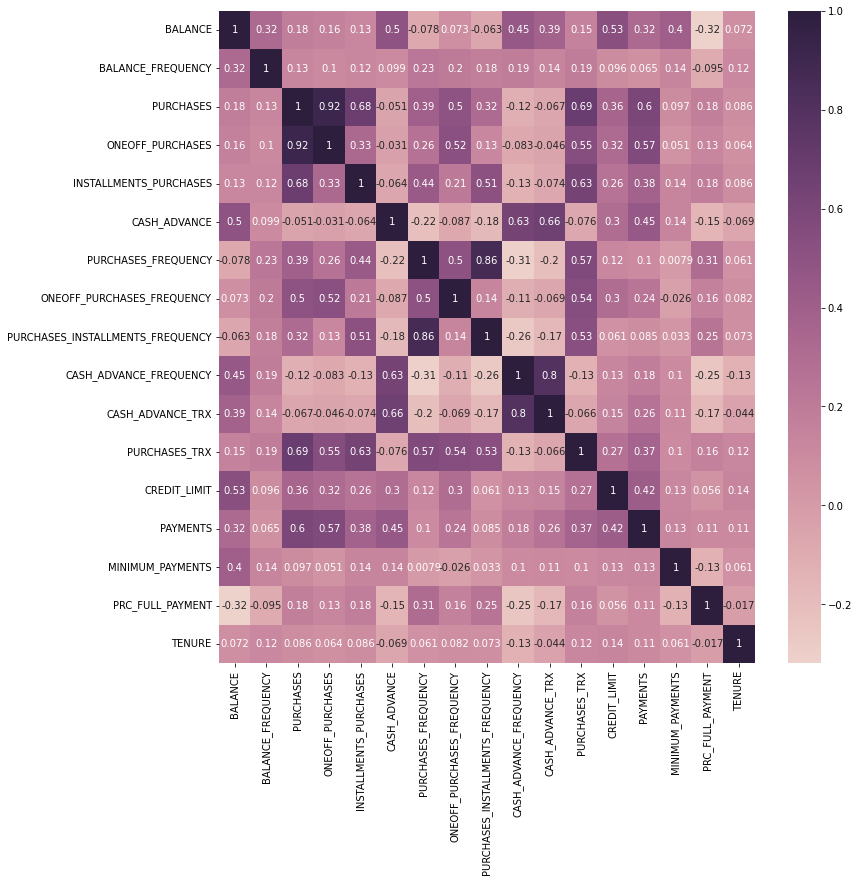

In [12]:
# Visualize correlation
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

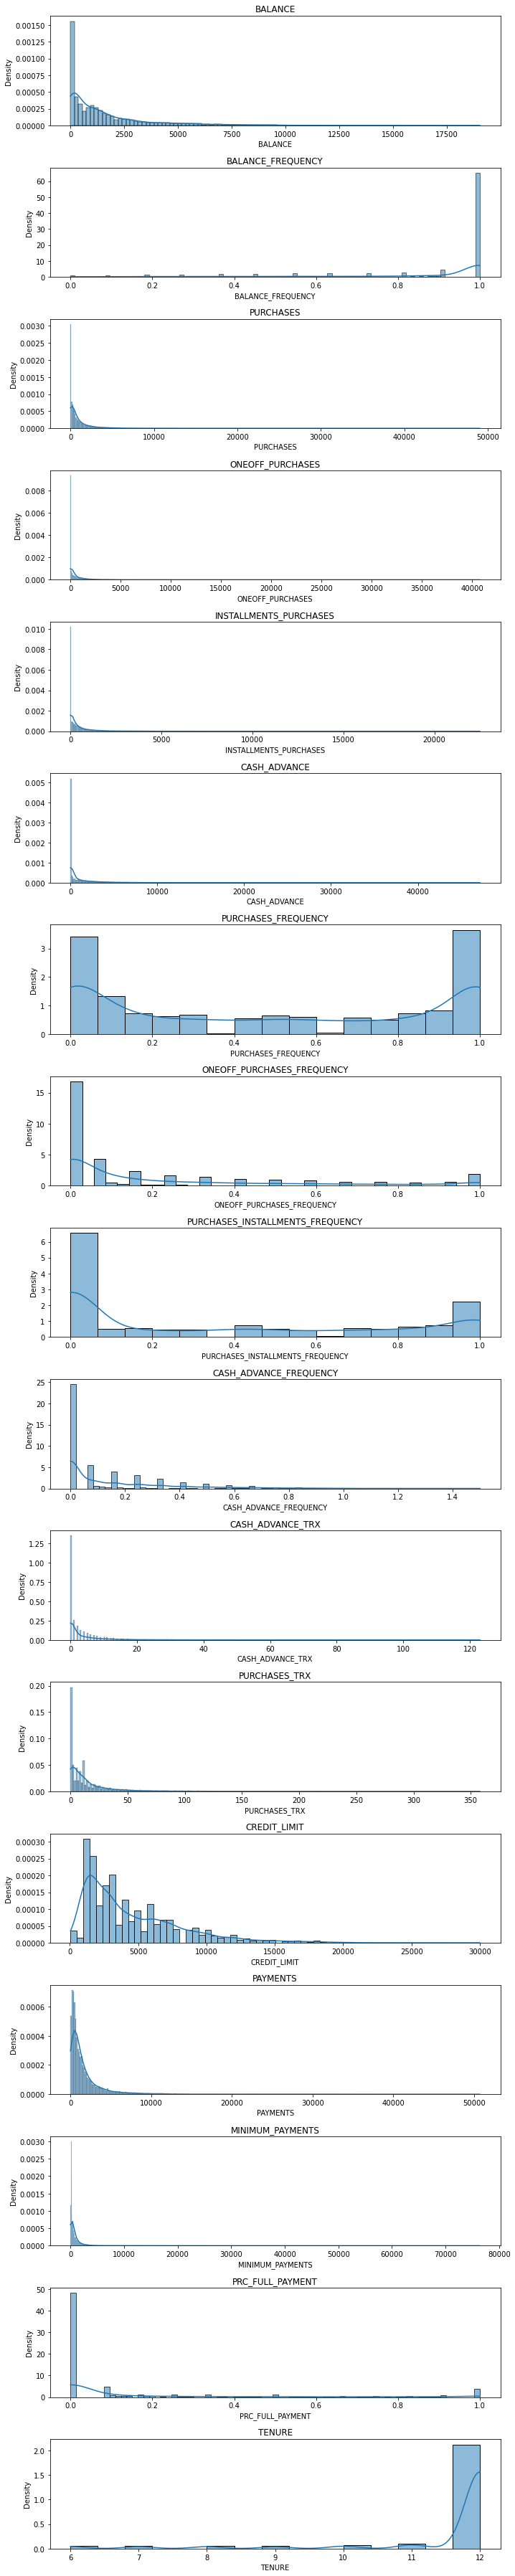

In [13]:
# Plot histograms for all columns
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.histplot(df[df.columns[i]], kde=True, stat="density")
    plt.title(df.columns[i])
plt.tight_layout()

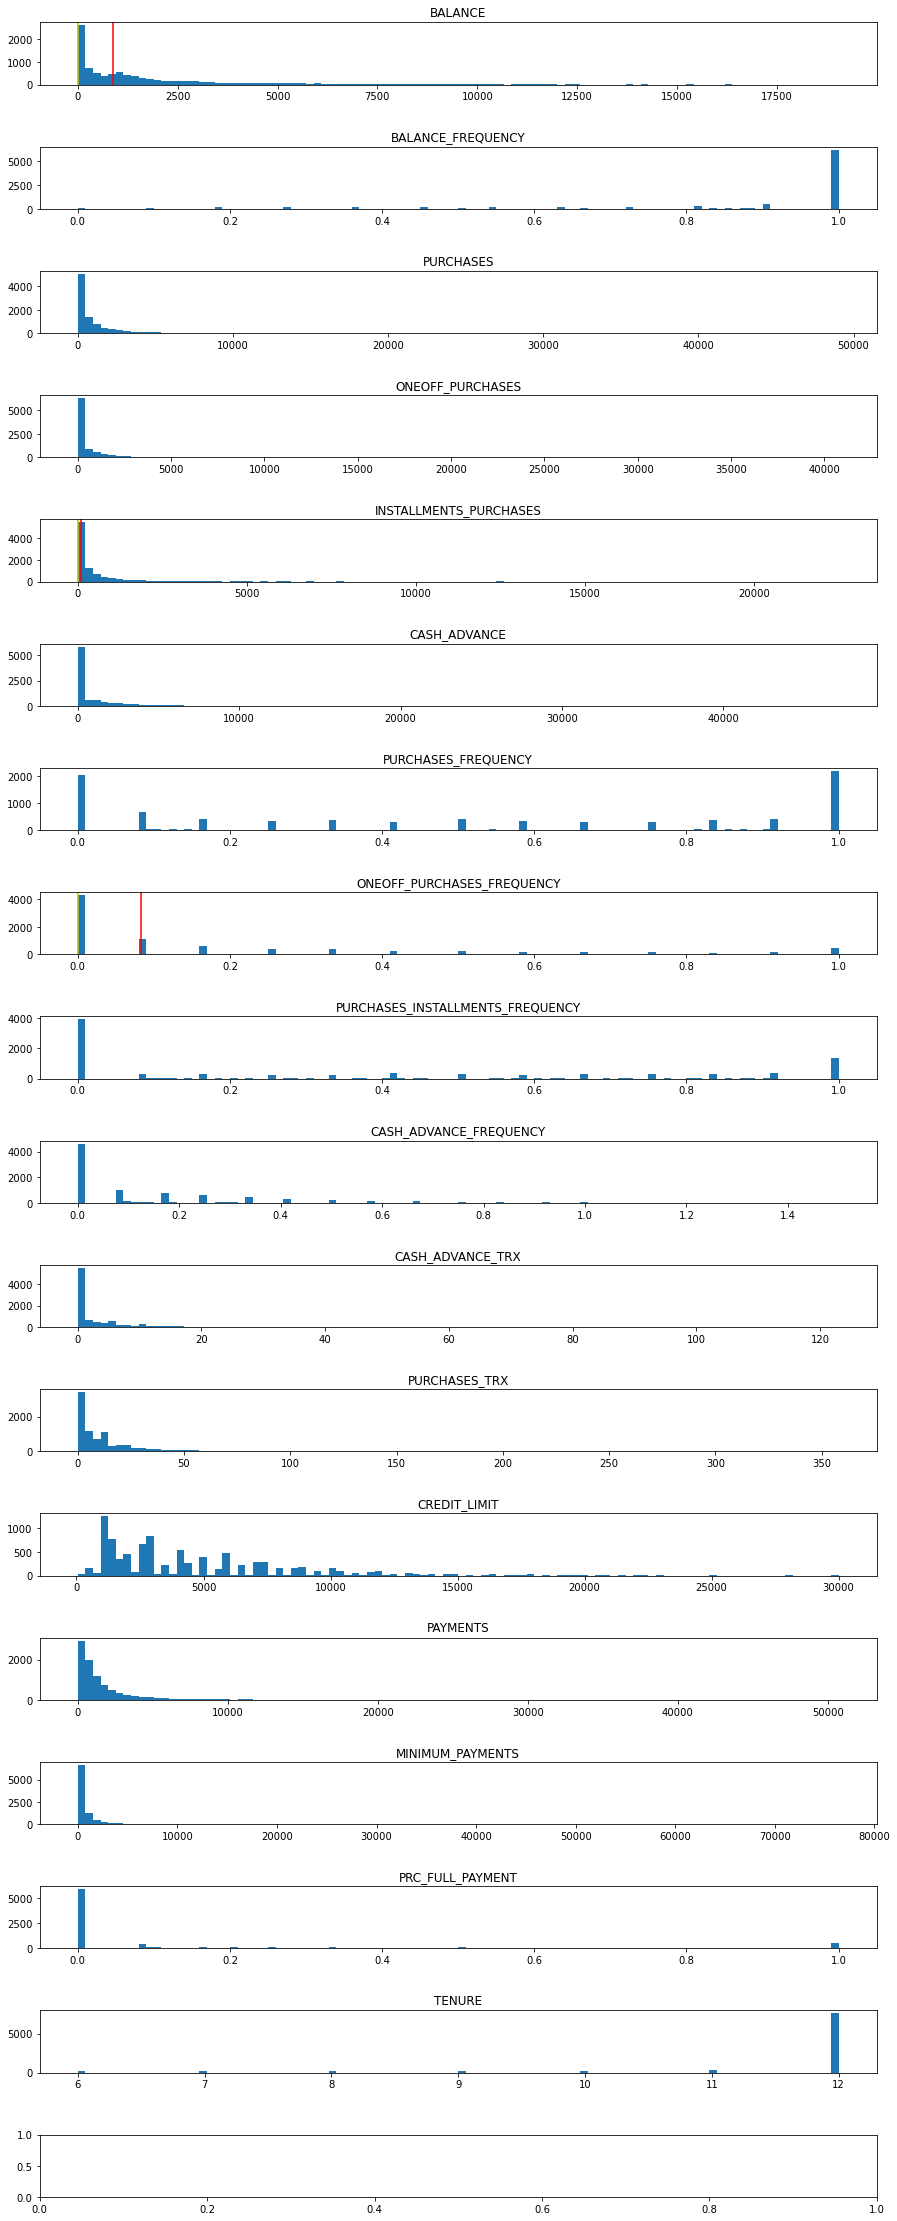

In [14]:
# Plot distribution for all columns
fig, ax = plt.subplots(18, figsize=(15,40))
for i, column in enumerate(df.columns):
    ax[i].hist(df[column], bins=100)
    ax[i].set_title(column)
    if i in [0, 4, 7]:
        ax[i].axvline(df[column].min(), c="y")
        ax[i].axvline(df[column].median(), c="r")

plt.subplots_adjust(hspace=1)
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

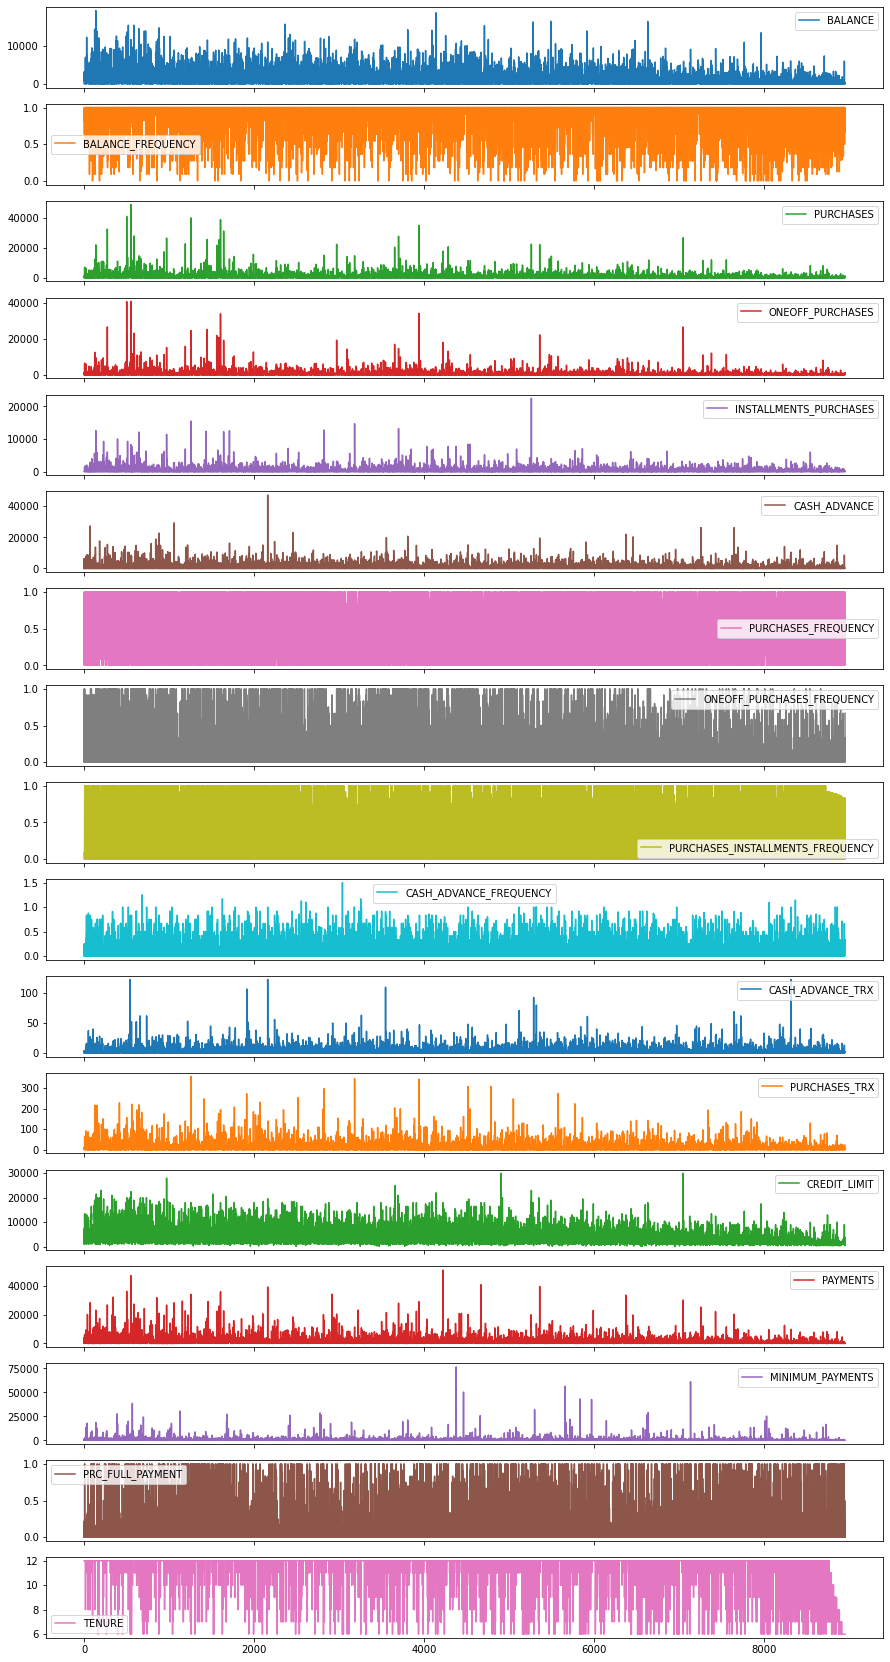

In [15]:
# Plot subplots for all columns
df.plot(subplots=True, figsize=(15, 30))

# Histogram

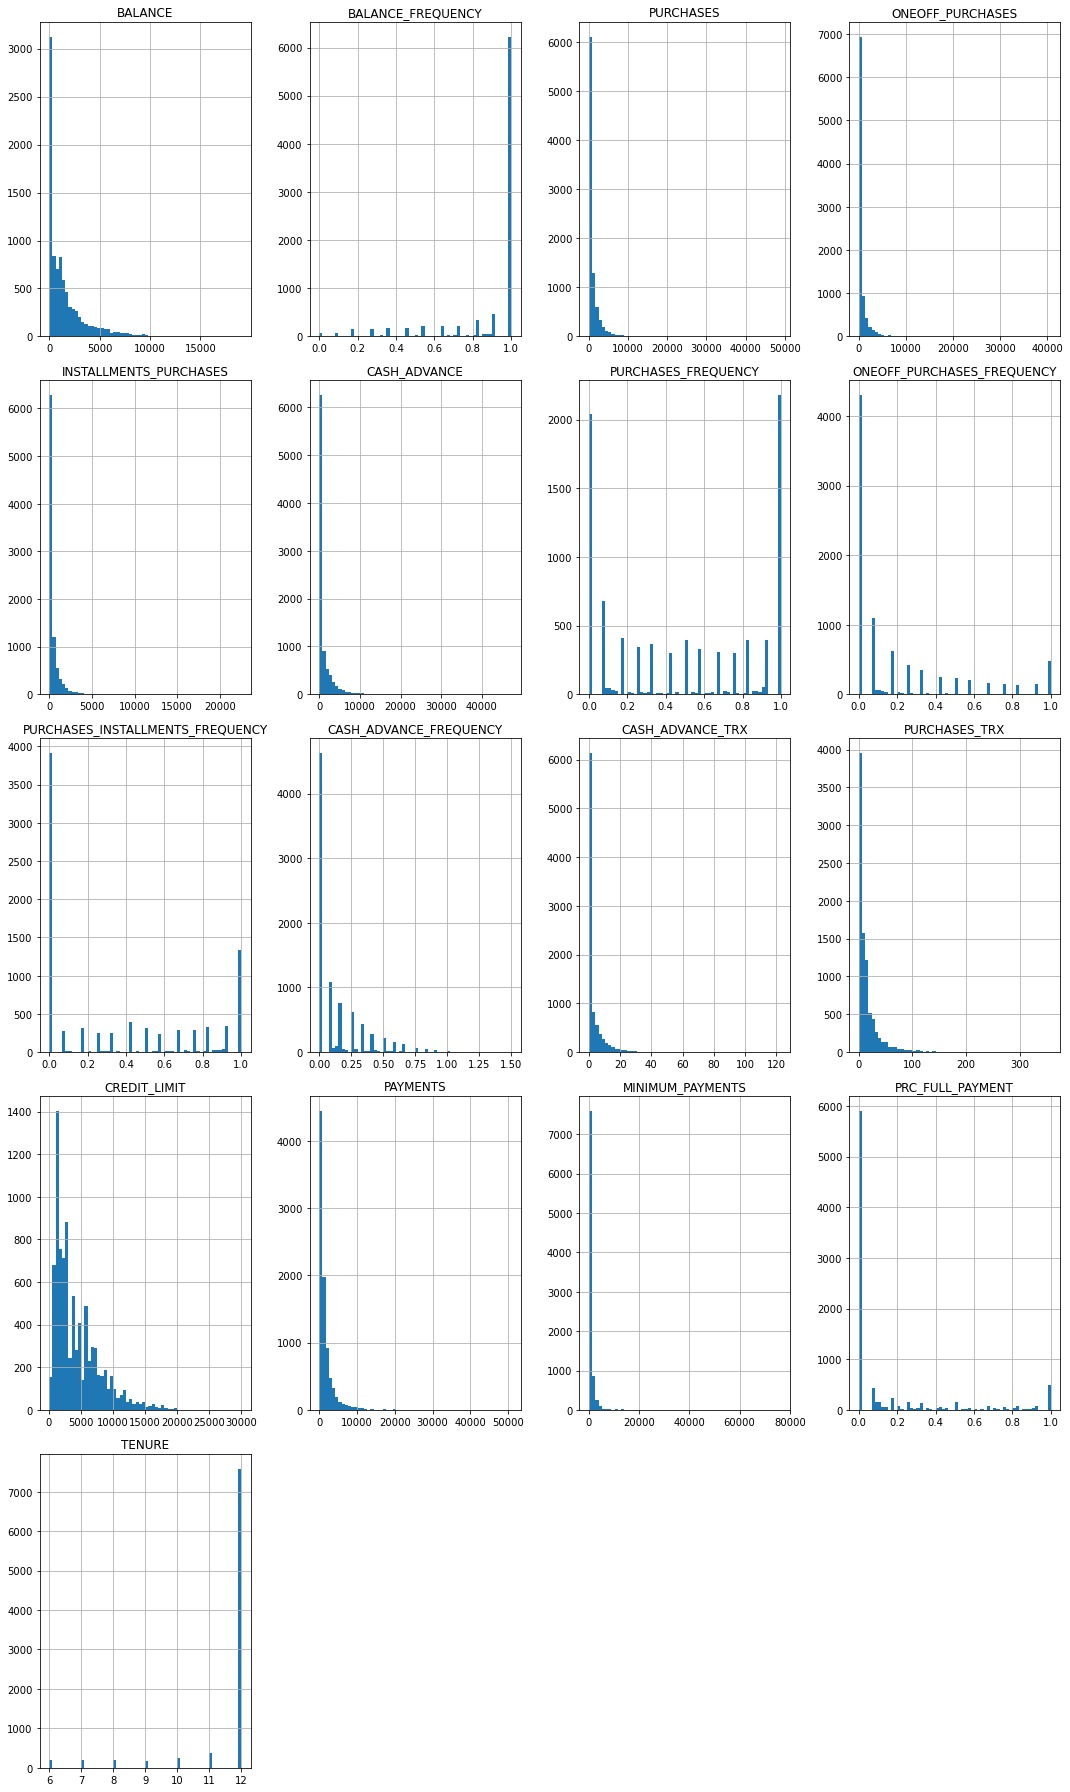

In [16]:
# Plot histogram to see the distribution
ax = df.hist(bins=60, figsize=(15,25), grid=True, alpha=1)
plt.tight_layout()

# Boxplot

<AxesSubplot:>

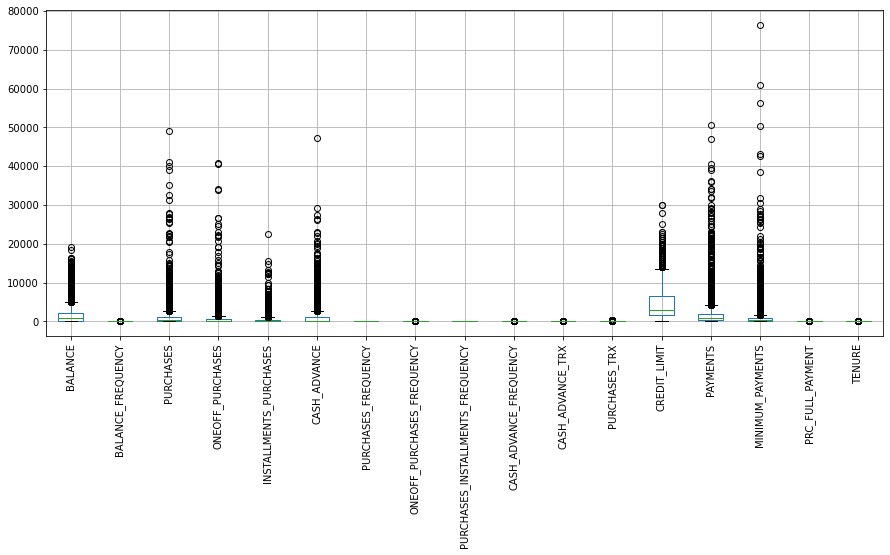

In [17]:
# Boxplot
df.boxplot(figsize=(15,6), rot=90)

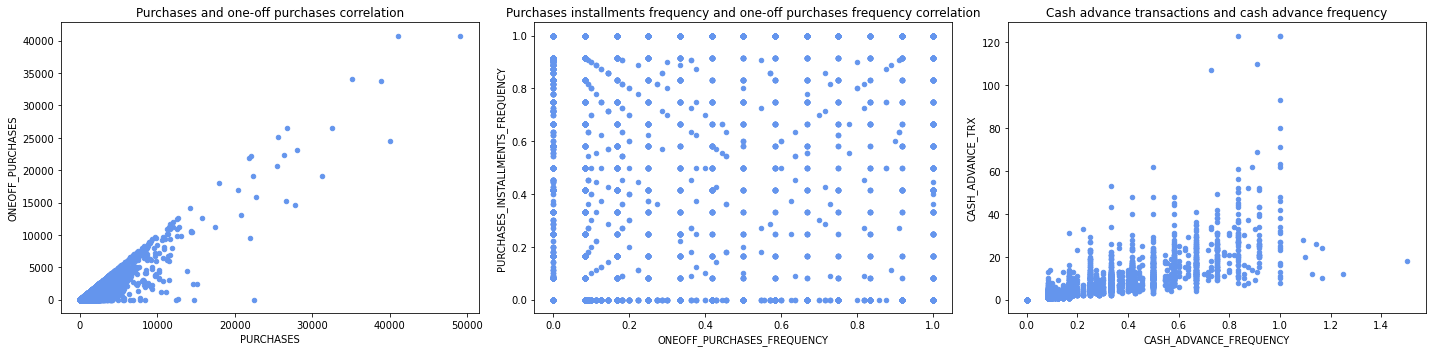

In [18]:
# Create scatterplot for most correlated columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

df.plot(x="PURCHASES", y="ONEOFF_PURCHASES", kind="scatter", c="cornflowerblue",
        title="Purchases and one-off purchases correlation", ax=ax1)
df.plot(x="ONEOFF_PURCHASES_FREQUENCY", y="PURCHASES_INSTALLMENTS_FREQUENCY",
        title="Purchases installments frequency and one-off purchases frequency correlation",
        kind="scatter", c="cornflowerblue", ax=ax2)
df.plot(x="CASH_ADVANCE_FREQUENCY", y="CASH_ADVANCE_TRX", kind="scatter", c="cornflowerblue",
        title="Cash advance transactions and cash advance frequency", ax=ax3)
plt.tight_layout()

# Scaling

In [19]:
# Scale the data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Scale the data using MinMaxScaler
scaler_mm = MinMaxScaler()
scaled_df_mm = scaler.fit_transform(df)

# Log transform the data
log_transformed_df = df.apply(lambda x: np.log1p(x))
log_transformed_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
...        ...                ...        ...               ...   
8945  3.384170           0.693147   5.677165          0.000000   
8946  3.004851           0.693147   5.707110          0.000000   
8947  3.194529           0.606136   4.979489          0.000000   
8948  2.671218           0.606136   0.000000          0.000000   
8949  5.923475           0.510826   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.154151   
1                   0.000000      8.770896             0.000000   
2                   0.000000      0.000000             0.693147   
3                   0.000000      5.331694             0.080042   
4                   0.000000      0.000000             0.080042   
...                      ...           ...                  ...   
8945                5.677165      0.000000             0.693147   
8946                5.707110      0.000000             0.693147   
8947                4.979489      0.000000             0.606136   
8948                0.000000      3.625907             0.000000   
8949                0.000000      4.852343             0.510826   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.080042   
1                       0.000000                          0.000000   
2                       0.693147                          0.000000   
3                       0.080042                          0.000000   
4                       0.080042                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.606136   
8946                    0.000000                          0.606136   
8947                    0.000000                          0.510826   
8948                    0.000000                          0.000000   
8949                    0.510826                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.098612      6.908755   
1                   0.223144          1.609438       0.000000      8.853808   
2                   0.000000          0.000000       2.564949      8.922792   
3                   0.080042          0.693147       0.693147      8.922792   
4                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       1.945910      6.908755   
8946                0.000000          0.000000       1.945910      6.908755   
8947                0.000000          0.000000       1.791759      6.908755   
8948                0.154151          1.098612       0.000000      6.216606   
8949                0.287682          1.098612       3.178054      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0     5.312231          4.945277          0.000000  2.564949  
1     8.319725          6.978531          0.200671  2.564949  
2     6.434654          6.442994          0.000000  2.564949  
3     0.000000          0.000000          0.000000  2.564949  
4     6.521114          5.504483          0.000000  2.564949  
...        ...               ...               ...       ...  
8945  5.788719          3.909748          0.405465  1.945910  
8946  5.623517          0.000000          0.000000  1.945910  
8947  4.410016          4.423869          0.223144  

# K-Means

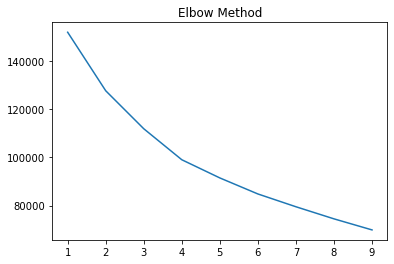

In [20]:
# Use elbow method to find the optimal number of clusters
elbow = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200)
    kmeans.fit(df_scaled)
    elbow.append(kmeans.inertia_)

plt.plot(range(1, 10), elbow)
plt.title("Elbow Method")
plt.show()

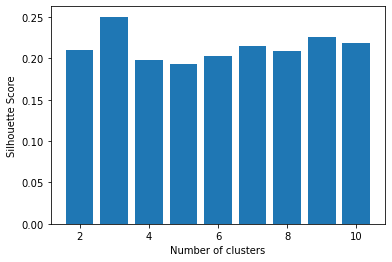

In [21]:
# Use silhouette method to find the optimal number of clusters
silhouette_scores = []

for n_cluster in range(2, 11):
    silhouette_scores.append(
        silhouette_score(df_scaled, KMeans(n_clusters=n_cluster).fit_predict(df_scaled))
    )

# Plot the silhouette scores to compare results
k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.bar(k, silhouette_scores)
plt.xlabel("Number of clusters", fontsize=10)
plt.ylabel("Silhouette Score", fontsize=10)
plt.show()

In [22]:
# Use KMeans to cluster the data
cluster = KMeans(n_clusters=3, max_iter=200)
cluster.fit(df_scaled)
cluster.labels_

array([1, 2, 1, ..., 1, 1, 1])

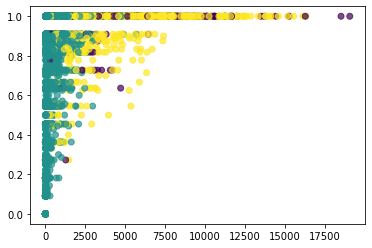

In [23]:
# Plot balance and balance frequency using the cluster labels
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster.labels_, alpha=0.7)

# Hierarchical

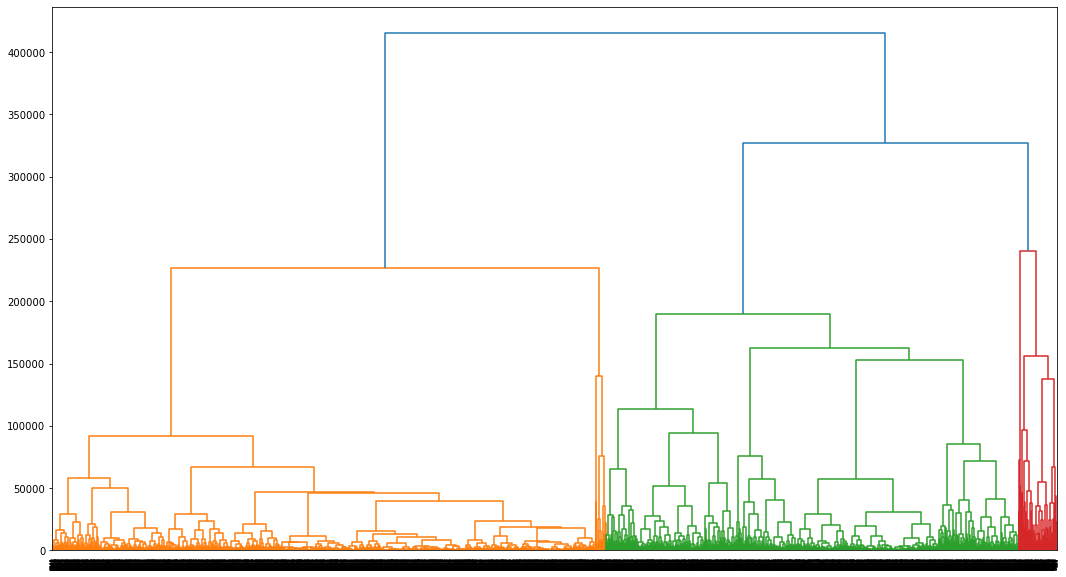

In [24]:
# Plot dendrogram to find the optimal number of clusters
plt.figure(figsize=(18, 10))
dend = shc.dendrogram(shc.linkage(df, method="ward"))
plt.show()

# Agglomerative Hierarchical clustering

In [25]:
# Agglomerative hierarchical clustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(df_scaled)

agg.labels_

array([1, 2, 0, ..., 1, 1, 1], dtype=int64)

## Meanshift clustering

In [26]:
# Mean shift clustering
meanshift = MeanShift(max_iter=50, n_jobs=-1)
meanshift.fit(df_scaled)

MeanShift(max_iter=50, n_jobs=-1)

## DBScan

In [27]:
# DBSCAN
dbscan = DBSCAN(eps=5)
dbscan.fit(df_scaled)

DBSCAN(eps=5)

## Model evaluation


In [28]:
# Calculate silhouette scores for different clustering models
print(f"Silhouette score for KMeans: {silhouette_score(df_scaled, cluster.labels_)}")
print(f"Silhouette score for MeanShift: {silhouette_score(df_scaled, meanshift.labels_)}")
print(f"Silhouette score for Agglomerative: {silhouette_score(df_scaled, agg.labels_)}")
print(f"Silhouette score for DBScan: {silhouette_score(df_scaled, dbscan.labels_)}")

Silhouette score for KMeans: 0.2507186093813761
Silhouette score for MeanShift: 0.27266865980937377
Silhouette score for Agglomerative: 0.17426626505925152
Silhouette score for DBScan: 0.7122978049555827


In [29]:
# Calculate Davies Bouldin scores for different clustering models
print(f"Davies Bouldin score for KMeans: {davies_bouldin_score(df_scaled, cluster.labels_)}")
print(f"Davies Bouldin score for MeanShift: {davies_bouldin_score(df_scaled, meanshift.labels_)}")
print(f"Davies Bouldin score for Agglomerative: {davies_bouldin_score(df_scaled, agg.labels_)}")
print(f"Davies Bouldin score for DBScan: {davies_bouldin_score(df_scaled, dbscan.labels_)}")

Davies Bouldin score for KMeans: 1.5967423592096728
Davies Bouldin score for MeanShift: 0.9121898116426728
Davies Bouldin score for Agglomerative: 1.8131944700869473
Davies Bouldin score for DBScan: 1.1290794276118443


In [30]:
# Calculate Calinski Harabasz scores for different clustering models
print(f"Calinski Harabasz score for KMeans: {calinski_harabasz_score(df_scaled, cluster.labels_)}")
print(f"Calinski Harabasz score for MeanShift: {calinski_harabasz_score(df_scaled, meanshift.labels_)}")
print(f"Calinski Harabasz score for Agglomerative: {calinski_harabasz_score(df_scaled, agg.labels_)}")
print(f"Calinski Harabasz score for DBScan: {calinski_harabasz_score(df_scaled, dbscan.labels_)}")


Calinski Harabasz score for KMeans: 1605.2111526177714
Calinski Harabasz score for MeanShift: 68.18932503561788
Calinski Harabasz score for Agglomerative: 1304.55919958641
Calinski Harabasz score for DBScan: 407.96126387543524


## Optimization

In [32]:
# Calculate silhouette scores for KMeans clustering with different number of clusters
kmeans_values = []
for num_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=num_clusters, random_state=40).fit_predict(df_scaled)
    sil_score = silhouette_score(df_scaled, kmeans)
    print(f"Silhouette score for {num_clusters} cluster k-means: {sil_score:.3f}")
    kmeans_values.append((num_clusters, sil_score))

Silhouette score for 2 cluster k-means: 0.209
Silhouette score for 3 cluster k-means: 0.250
Silhouette score for 4 cluster k-means: 0.198
Silhouette score for 5 cluster k-means: 0.193
Silhouette score for 6 cluster k-means: 0.198
Silhouette score for 7 cluster k-means: 0.209
Silhouette score for 8 cluster k-means: 0.222
Silhouette score for 9 cluster k-means: 0.209


In [33]:
# Calculate silhouette scores for hierarchical clustering with different number of clusters and linkage methods
siliuette_list_hierarchical = []
for num_clusters in range(2, 20, 2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, n_clusters=num_clusters).fit_predict(df_scaled)
        sil_score = silhouette_score(df_scaled, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((num_clusters, sil_score, linkage_method, len(set(agglomerative)) ))
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical,
                               columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [34]:
# Sort df_hierarchical by the highest silhouette score
df_hierarchical.sort_values('sil_score', ascending=False, inplace=True)
df_hierarchical

cluster  sil_score linkage_method  number_of_clusters
1         2   0.849686        average                   2
4         4   0.810272        average                   4
2         2   0.786539       complete                   2
5         4   0.779009       complete                   4
7         6   0.735792        average                   6
10        8   0.723929        average                   8
13       10   0.670720        average                  10
16       12   0.660070        average                  12
19       14   0.656202        average                  14
22       16   0.655658        average                  16
25       18   0.611439        average                  18
8         6   0.579733       complete                   6
11        8   0.568545       complete                   8
17       12   0.433898       complete                  12
14       10   0.433412       complete                  10
23       16   0.363052       complete                  16
26       18   0.362886       complete                  18
20       14   0.362194       complete                  14
0         2   0.186991           ward                   2
3         4   0.176260           ward                   4
24       18   0.168148           ward                  18
21       16   0.164003           ward                  16
12       10   0.163052           ward                  10
18       14   0.159992           ward                  14
15       12   0.151346           ward                  12
9         8   0.149510           ward                   8
6         6   0.121884           ward                   6

In [35]:
# Print out the best hyperparameters for Agglomerative Clustering
best_linkage_method = df_hierarchical.iloc[0]['linkage_method']
best_n_clusters = df_hierarchical.iloc[0]['cluster']

print(f"Best linkage method: {best_linkage_method}")
print(f"Best number of clusters: {best_n_clusters}")

Best linkage method: average
Best number of clusters: 2


Hierarchical method shows high sillouette score, although after checking number of variables in each cluster and clusters themselves, this method seems not suitable for this particular dataset.

In [36]:
# Use the best hyperparameters to fit and transform df_scaled using Agglomerative Clustering
agg = AgglomerativeClustering(linkage=best_linkage_method, n_clusters=best_n_clusters)
agg.fit(df_scaled)

AgglomerativeClustering(linkage='average')

In [37]:
# Print out the evaluation metrics for Agglomerative Clustering
print(f"Silhouette score for Agglomerative: {silhouette_score(df_scaled, agg.labels_)}")
print(f"Davies Bouldin score for Agglomerative: {davies_bouldin_score(df_scaled, agg.labels_)}")
print(f"Calinski Harabasz score for Agglomerative: {calinski_harabasz_score(df_scaled, agg.labels_)}")

Silhouette score for Agglomerative: 0.8496861631092023
Davies Bouldin score for Agglomerative: 0.38071111572504346
Calinski Harabasz score for Agglomerative: 324.22480138949373


In [38]:
# optimize DBSCAN parameters
siliuette_list_dbscan = []
eps_range = np.arange(0.1, 2, 0.2)
min_samples_range = range(1, 10)

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)
        sil_score = silhouette_score(df_scaled, labels)
        siliuette_list_dbscan.append((eps, min_samples, sil_score, len(set(labels))))

df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', \
                                                         'number_of_clusters'])

In [39]:
# Sort df_dbscan by the highest silhouette score
df_dbscan.sort_values('sil_score', ascending=False, inplace=True)

In [40]:
# Print out the best hyperparameters for DBSCAN
best_eps = df_dbscan.iloc[0]['eps']
best_min_samples = df_dbscan.iloc[0]['min_samples']

print(f"Best eps value: {best_eps}")
print(f"Best min_samples value: {best_min_samples}")

Best eps value: 1.9000000000000004
Best min_samples value: 5.0


In [41]:
# Use the best hyperparameters to fit and transform df_scaled using DBSCAN
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan.fit(df_scaled)

DBSCAN(eps=1.9000000000000004, min_samples=5.0)

In [42]:
# Print out the evaluation metrics for Agglomerative Clustering
print(f"Silhouette score for Agglomerative: {silhouette_score(df_scaled, dbscan.labels_)}")
print(f"Davies Bouldin score for Agglomerative: {davies_bouldin_score(df_scaled, dbscan.labels_)}")
print(f"Calinski Harabasz score for Agglomerative: {calinski_harabasz_score(df_scaled, dbscan.labels_)}")

Silhouette score for Agglomerative: 0.46198545676944947
Davies Bouldin score for Agglomerative: 2.118368478888186
Calinski Harabasz score for Agglomerative: 991.2552441707404


With DBSCAN after checking the cluster and distribution of variables in them. This method is not convenient, since most of the variables are in one cluster. That is why I continued with KMeans, with 3 clusters

In [43]:
# Set up KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=40)

# Fit KMeans to the data and get the labels
kmeans_labels = kmeans.fit_predict(df_scaled)

# Add the cluster labels as a new column in the dataframe
df['CLUSTER'] = kmeans_labels

In [44]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  CLUSTER  
0      201.802084        139.509787          0.000000      12        1  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        1  
3        0.000000          0.000000          0.000000      12        1  
4      678.334763        244.791237          0.000000      12        1  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        1  
89

## Cluster visualizaiton

In [47]:
# Function to perform PCA and return a dataframe of the transformed data
def do_pca(data, n_components=2):
    # Perform PCA and transform the data
    pca = PCA(n_components=n_components).fit(data)
    transformed_data = pca.fit_transform(data)
    
     # Print original and transformed shape
    print("original shape:   ", data.shape)
    print("transformed shape:", transformed_data.shape)
    
    # Create a dataframe from the transformed data
    df_pca = pd.DataFrame(transformed_data) 
    df_pca.columns = [f'A{i+1}' for i in range(n_components)]
    return df_pca

def plot_pca_cluster(df_pca, clustering_model):
    plt.scatter(df_pca['A1'], df_pca['A2'], c=clustering_model.fit_predict(df_pca), cmap=None)
    plt.show()
    
# Function to plot the data in 3D using plotly
def plot_pca_3d(df_pca, color_column=None):
    fig = px.scatter_3d(df_pca, x=df_pca['A1'], y= df_pca['A2'], z=df_pca['A3'], color=color_column) 
    fig.update_traces(marker=dict(size=7, line = dict(width=5, color="black")))
    fig.show()

In [48]:
# Function to plot a radar chart
def plot_radar_chart(df_radar, r_column, theta_column, color_column=None):
    fig = px.line_polar(df_radar, r=r_column, theta=theta_column, color=color_column, line_close=True)
    fig.show()

original shape:    (8949, 17)
transformed shape: (8949, 2)


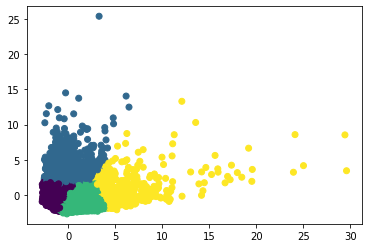

In [53]:
# Perform PCA on the scaled data in df_scaled
df_pca = do_pca(df_scaled)
# Apply KMeans clustering with 4 clusters to the PCA-transformed data
plot_pca_cluster(df_pca, KMeans(n_clusters=4, random_state=40))

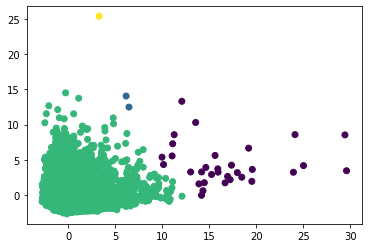

In [54]:
# Apply Agglomerative Clustering with 4 clusters and 'average' linkage to the PCA-transformed data
plot_pca_cluster(df_pca, AgglomerativeClustering(n_clusters=4, linkage='average'))

## Log Scale

original shape:    (8949, 17)
transformed shape: (8949, 2)


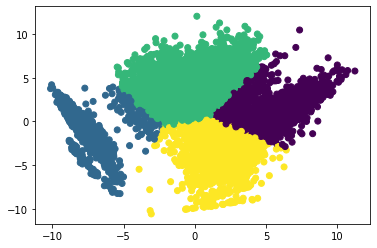

In [55]:
log_transformed_df_pca = do_pca(log_transformed_df)
plot_pca_cluster(log_transformed_df_pca, KMeans(n_clusters=4, random_state=40))

## PCA 3-dimensions

In [56]:
# Perform PCA on df_scaled and plot the results in 3D
df_pca = do_pca(df_scaled, n_components=3)
plot_pca_3d(df_pca, color_column=df['CLUSTER'])

original shape:    (8949, 17)
transformed shape: (8949, 3)


## Log scaled 3d plot

In [57]:
# Perform PCA on df_log and plot the results in 3D
df_log_pca = do_pca(log_transformed_df, n_components=3)
plot_pca_3d(df_log_pca, color_column=df['CLUSTER'])

original shape:    (8949, 17)
transformed shape: (8949, 3)


## Radar chart

In [76]:
# Get the column names from the original dataframe
df_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']

# Create a dataframe of the scaled data
df_radar = pd.DataFrame(df_scaled, columns=df_columns)
df_radar

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.732054          -0.249881  -0.424934         -0.356957   
1     0.786858           0.134049  -0.469584         -0.356957   
2     0.447041           0.517980  -0.107716          0.108843   
3     0.049015          -1.017743   0.231995          0.546123   
4    -0.358849           0.517980  -0.462095         -0.347317   
...        ...                ...        ...               ...   
8944 -0.738015           0.517980  -0.333331         -0.356957   
8945 -0.742488           0.517980  -0.329174         -0.356957   
8946 -0.740463          -0.185895  -0.402000         -0.356957   
8947 -0.745239          -0.185895  -0.469584         -0.356957   
8948 -0.572644          -0.889766   0.042092          0.301677   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349114     -0.466805            -0.806649   
1                  -0.454607      2.605438            -1.221928   
2                  -0.454607     -0.466805             1.269742   
3                  -0.454607     -0.368678            -1.014290   
4                  -0.454607     -0.466805            -1.014290   
...                      ...           ...                  ...   
8944               -0.132688     -0.466805             1.269742   
8945               -0.122869     -0.466805             1.269742   
8946               -0.294930     -0.466805             0.854463   
8947               -0.454607     -0.449373            -1.221928   
8948               -0.454607     -0.406228             0.439186   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678716                         -0.707409   
1                      -0.678716                         -0.917090   
2                       2.673295                         -0.917090   
3                      -0.399383                         -0.917090   
4                      -0.399383                         -0.917090   
...                          ...                               ...   
8944                   -0.678716                          1.179720   
8945                   -0.678716                          1.179720   
8946                   -0.678716                          0.760359   
8947                   -0.678716                         -0.917090   
8948                    1.555959                         -0.917090   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675294         -0.476083      -0.511381     -0.960380   
1                   0.573949          0.110032      -0.591841      0.688601   
2                  -0.675294         -0.476083      -0.109082      0.826016   
3                  -0.258882         -0.329554      -0.551611      0.826016   
4                  -0.675294         -0.476083      -0.551611     -0.905414   
...                      ...               ...            ...           ...   
8944               -0.675294         -0.476083      -0.350461     -0.960380   
8945               -0.675294         -0.476083      -0.350461     -0.960380   
8946               -0.675294         -0.476083      -0.390691     -0.960380   
8947                0.157536         -0.183026      -0.591841     -1.097795   
8948                0.990362         -0.183026       0.333446     -0.905414   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.529026         -0.297334         -0.525588  0.360541  
1     0.818546          0.101998          0.234159  0.360541  
2    -0.383857         -0.088524         -0.525588  0.360541  
3    -0.598733         -0.357057         -0.525588  0.360541  
4    -0.364421         -0.252265         -0.525588  0.360541  
...        ...               ...               ...       ...  
8944 -0.486266         -0.336129          1.183844 -4.126919  
8945 -0.503445         -0.357057         -0.525588 -4.126919  
8946 -0.570660         -0.321774          0.329128 -

In [79]:
#Radar-chart
df_radar['cluster'] = kmeans.labels_
df_radar = df_radar.groupby('cluster').mean().reset_index()
df_radar = pd.melt(df_radar, id_vars = ['cluster'], var_name= 'Feature', value_name='Mean', value_vars = list(df_radar_scaled.columns))
fig = px.line_polar(df_radar, r="Mean", theta='Feature', color = 'cluster', line_close = True)
fig.show()

C:\Users\azizbek.dzheenbekov\Anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\azizbek.dzheenbekov\Anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\azizbek.dzheenbekov\Anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [83]:
df_radar_log = pd.DataFrame(log_transformed_df, columns=df_columns)
df_radar_log

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
...        ...                ...        ...               ...   
8945  3.384170           0.693147   5.677165          0.000000   
8946  3.004851           0.693147   5.707110          0.000000   
8947  3.194529           0.606136   4.979489          0.000000   
8948  2.671218           0.606136   0.000000          0.000000   
8949  5.923475           0.510826   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.154151   
1                   0.000000      8.770896             0.000000   
2                   0.000000      0.000000             0.693147   
3                   0.000000      5.331694             0.080042   
4                   0.000000      0.000000             0.080042   
...                      ...           ...                  ...   
8945                5.677165      0.000000             0.693147   
8946                5.707110      0.000000             0.693147   
8947                4.979489      0.000000             0.606136   
8948                0.000000      3.625907             0.000000   
8949                0.000000      4.852343             0.510826   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.080042   
1                       0.000000                          0.000000   
2                       0.693147                          0.000000   
3                       0.080042                          0.000000   
4                       0.080042                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.606136   
8946                    0.000000                          0.606136   
8947                    0.000000                          0.510826   
8948                    0.000000                          0.000000   
8949                    0.510826                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.098612      6.908755   
1                   0.223144          1.609438       0.000000      8.853808   
2                   0.000000          0.000000       2.564949      8.922792   
3                   0.080042          0.693147       0.693147      8.922792   
4                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       1.945910      6.908755   
8946                0.000000          0.000000       1.945910      6.908755   
8947                0.000000          0.000000       1.791759      6.908755   
8948                0.154151          1.098612       0.000000      6.216606   
8949                0.287682          1.098612       3.178054      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0     5.312231          4.945277          0.000000  2.564949  
1     8.319725          6.978531          0.200671  2.564949  
2     6.434654          6.442994          0.000000  2.564949  
3     0.000000          0.000000          0.000000  2.564949  
4     6.521114          5.504483          0.000000  2.564949  
...        ...               ...               ...       ...  
8945  5.788719          3.909748          0.405465  1.945910  
8946  5.623517          0.000000          0.000000  1.945910  
8947  4.410016          4.423869          0.223144  

In [84]:
#Radar-chart
df_radar_log['cluster'] = kmeans.labels_
df_radar_log = df_radar_log.groupby('cluster').mean().reset_index()
df_radar_log = pd.melt(df_radar_log, id_vars = ['cluster'], var_name= 'Feature', value_name='Mean', 
                        value_vars = list(df_radar_scaled.columns))
fig = px.line_polar(df_radar_log, r="Mean", theta='Feature', color = 'cluster', line_close = True)
fig.show()

C:\Users\azizbek.dzheenbekov\Anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\azizbek.dzheenbekov\Anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\azizbek.dzheenbekov\Anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

